In [30]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import model_selection, ensemble, decomposition, svm, feature_selection
from matplotlib import pyplot as plt
import scikitplot as skplt # 绘画roc曲线

In [2]:
file_path = '/Users/apple/Desktop/Santander/train.csv'
data = pd.read_csv(file_path)
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
data.shape

(200000, 202)

In [4]:
X = data.iloc[:, 2:]
y = data['target']

X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3, random_state=0)
# 恢复索引
for i in [X_train,X_test, y_train, y_test]:
    i.index = range(i.shape[0])
    
    

In [6]:
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=100,
                                      n_jobs=10,
                                      random_state=66,
                                     ).fit(X_train, y_train)
print(clf.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.8981


'03:06'

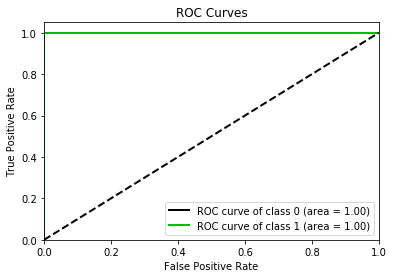

In [7]:
skplt.metrics.plot_roc(y_train,
                        clf.predict_proba(X_train),
                        plot_micro=False,
                        plot_macro=False,
                      )

In [8]:
# 特征选择 
# 第一种尝试 先过滤掉方差为0的数据 过滤掉2个
X_var = feature_selection.VarianceThreshold().fit_transform(X)
X_var.shape

(200000, 200)

In [9]:
start = time.time()

clf = ensemble.RandomForestClassifier(n_estimators=100,
                                      n_jobs=10,
                                      random_state=66,
                                     ).fit(X_var, y)
print(clf.score(X_var, y))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

1.0


'04:29'

In [20]:
# 查看特征对模型的贡献度
clf.feature_importances_

array([0.00646815, 0.00648133, 0.00663217, 0.00418154, 0.00409377,
       0.0052261 , 0.00769646, 0.00387705, 0.00419055, 0.00603774,
       0.0037018 , 0.00431829, 0.00966686, 0.00688591, 0.00371598,
       0.00431187, 0.00406745, 0.00376255, 0.00581136, 0.00415077,
       0.00424444, 0.00667404, 0.00770575, 0.00433967, 0.00456642,
       0.00393642, 0.00852976, 0.00381523, 0.00433436, 0.00398938,
       0.00382773, 0.00405398, 0.00491288, 0.00599933, 0.00621514,
       0.00494407, 0.00487108, 0.00416002, 0.00389695, 0.00409354,
       0.00656136, 0.00395978, 0.0039154 , 0.0047912 , 0.00658915,
       0.00420955, 0.00426125, 0.00386608, 0.00445882, 0.0048411 ,
       0.00411832, 0.00504936, 0.00445986, 0.00898172, 0.00381942,
       0.00431908, 0.00508676, 0.00392842, 0.00419417, 0.00399013,
       0.00424744, 0.00393704, 0.00411393, 0.00421766, 0.00404906,
       0.0039081 , 0.00428851, 0.00522204, 0.00407461, 0.0042937 ,
       0.00425357, 0.00471605, 0.00395017, 0.00393333, 0.00403

In [23]:
# 查看对模型贡献度大于0.005的特征有多少
print(clf.feature_importances_[clf.feature_importances_>0.005].shape)
# 查看对模型贡献度大于0.005 总共有多少
print(np.sum(clf.feature_importances_[clf.feature_importances_>0.005]))

(65,)
0.42296756850867895


In [10]:
# 再次使用方差过滤 过滤掉方差小于0.01的数据 
X_var = feature_selection.VarianceThreshold(0.01).fit_transform(X)
X_var.shape

(200000, 199)

In [11]:
# 再次使用互信息法进行相关性过滤 过滤掉互信息量小于0的特征
result = feature_selection.mutual_info_classif(X_var, y)
result

array([1.96111551e-03, 1.00575628e-03, 1.62868595e-03, 9.70959165e-04,
       0.00000000e+00, 1.28142682e-03, 1.77569526e-03, 1.00767810e-03,
       1.64187907e-04, 2.58524284e-03, 9.20739862e-04, 0.00000000e+00,
       3.47687408e-03, 1.87348064e-03, 0.00000000e+00, 1.22378950e-03,
       6.57866776e-04, 0.00000000e+00, 6.82340872e-04, 4.82163117e-04,
       1.24166788e-04, 2.24223402e-03, 2.06314883e-03, 8.28364034e-05,
       1.32123077e-03, 7.55320664e-05, 2.77897690e-03, 7.48875169e-04,
       0.00000000e+00, 8.74377416e-04, 0.00000000e+00, 2.29675034e-04,
       1.45810975e-03, 2.20423849e-04, 1.96389316e-03, 6.76667656e-04,
       2.40786633e-04, 1.96160703e-03, 0.00000000e+00, 0.00000000e+00,
       1.34556702e-03, 1.21859059e-03, 6.46611056e-04, 0.00000000e+00,
       1.94170551e-03, 6.56433622e-04, 0.00000000e+00, 1.32207816e-04,
       8.67225964e-05, 0.00000000e+00, 0.00000000e+00, 1.18950492e-03,
       7.23458947e-04, 3.25583277e-03, 5.42838494e-04, 2.24816961e-04,
      

In [24]:
# result[result>0].shape  # (147,)
start = time.time()

k = result[result>0].shape[0]
x_fmic = feature_selection.SelectKBest(feature_selection.mutual_info_classif, k).fit_transform(X_var, y)
# 
rfc = ensemble.RandomForestClassifier(n_estimators=10, random_state=66, n_jobs=3)
print(model_selection.cross_val_score(rfc, x_fmic, y, cv=5).mean())

datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

KeyboardInterrupt: 

In [ ]:
# 使用嵌入法筛选特征
rfc_em = ensemble.RandomForestClassifier(n_estimators=10, random_state=66)
x_embedded = feature_selection.SelectFromModel(rfc_em, threshold=0.005).fit_transform(X, y)
print(x_embedded.shape)

start = time.time()

# 接下来是绘画学习曲线
threshold = np.linspace(0, rfc_em.fit(X, y).feature_importances_.max(), 20)
score = []
for i in threshold:
    x_embed = feature_selection.SelectFromModel(rfc_em, threshold=i).fit_transform(X, y)
    mean_score = model_selection.cross_val_score(rfc_em, x_embed, y, cv=5).mean()
    score.append(mean_score)

plt.plot(threshold, score)
plt.show()

datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

(200000, 63)


In [34]:
np.linspace(1, clf.feature_importances_.max(), 10)

array([1.        , 0.89026922, 0.78053844, 0.67080766, 0.56107688,
       0.4513461 , 0.34161532, 0.23188454, 0.12215376, 0.01242298])

In [6]:

# 对于样本不均衡问题采用class_weight 来设置
start = time.time()

rfc = ensemble.RandomForestClassifier(n_estimators=100, 
                                      class_weight='balanced',
                                     ).fit(X_train, y_train)
print(rfc.score(X_test, y_test))
datetime.fromtimestamp(time.time() - start).strftime("%M:%S")

0.8981


'04:55'

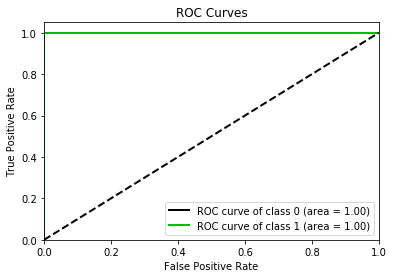

In [13]:
# 虽然这样auc面积很好 但是准确率有点低
skplt.metrics.plot_roc(y_train,
                        rfc.predict_proba(X_train),
                        plot_micro=False,
                        plot_macro=False,
#                         classes_to_plot=None,
#                         ax=None,
#                         figsize=None,
#                         cmap='nipy_spectral',
#                         title_fontsize='large',
#                         text_fontsize='medium',
                      )

In [ ]:
# 调参
# 使用n_estimators 绘画学习曲线  挑选出最优的n_estimators
train_score = []
test_score = []
for i in range(10, 600, 40):
    clf = ensemble.RandomForestClassifier(n_estimators=i, 
                                          oob_score=True, 
                                          n_jobs=4,
                                          random_state=66,
                                         ).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.oob_score_)

plt.figure()
plt.plot(range(10, 600, 40), train_score, 'b--')
plt.plot(range(10, 600, 40), test_score, 'r-')
plt.show()

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
